# Лабораторная работа №5. Сегментация изображений
<br>
<br>

1. Бинаризация. Выбрать произвольное изображение. Выполнить бинаризацию изображения при помощи рассмотренных методов. В зависимости от изображения использовать бинаризацию по верхнему или нижнему порогу.
2. Сегментация 1. Выбрать произвольное изображение, содержащее лицо(-а). Выполнить сегментацию изображения либо по принципу Вебера, либо на основе цвета кожи (на выбор).

3. Сегментация 2. Выбрать произвольное изображение, содержащее ограниченное количество цветных объектов. Выполнить сегментацию изображения в пространстве CIE Lab либо по методу ближайших соседей, либо по методу 𝑘-средних
(на выбор).
4. Сегментация 3. Выбрать произвольное изображение, содержащее две разнородные текстуры. Выполнить текстурную сегментацию изображения, оценить не менее трех параметров выделенных текстур, определить к какому классу относятся текстуры.

## бинаризация

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


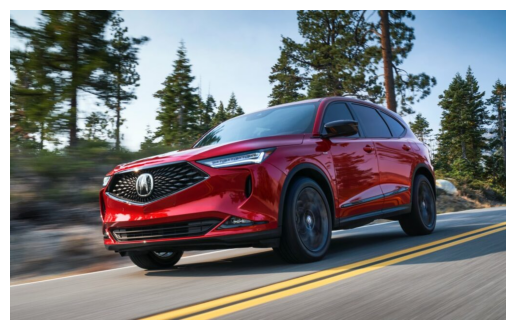

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
from skimage import exposure
from skimage.filters import threshold_otsu, rank
from skimage.morphology import disk

drive.mount('/content/drive')

image_path = '/content/drive/My Drive/car.jpg'
image = cv2.imread(image_path)

# Преобразование изображения из BGR (формат OpenCV) в RGB (формат для matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Отображение изображения с помощью matplotlib
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


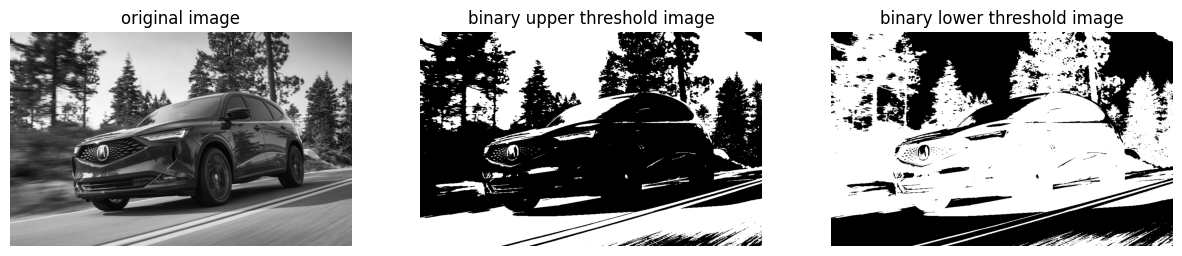

In [14]:
original_image = image_rgb
original_image = LabeledImage("original image", cv2.imread('/content/drive/My Drive/car.jpg', cv2.IMREAD_GRAYSCALE))

class LabeledImage:
    def __init__(self, label, image):
        self.label = label
        self.image = image

def show_multiple_images(*images):
    num_images = len(images)
    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))

    if num_images == 1:
        axs = [axs]

    for ax, img in zip(axs, images):
        ax.imshow(img.image, cmap='gray')
        ax.set_title(img.label)
        ax.axis('off')
    plt.show()
# Пороговая бинаризация
_, binary_upper = cv2.threshold(original_image.image, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
# Инвертированная пороговая бинаризация
_, binary_lower = cv2.threshold(original_image.image, thresh=127, maxval=255, type=cv2.THRESH_BINARY_INV)
show_multiple_images(
    original_image,
    LabeledImage('binary upper threshold image', binary_upper),
    LabeledImage('binary lower threshold image', binary_lower)
)

## Сегментация 1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


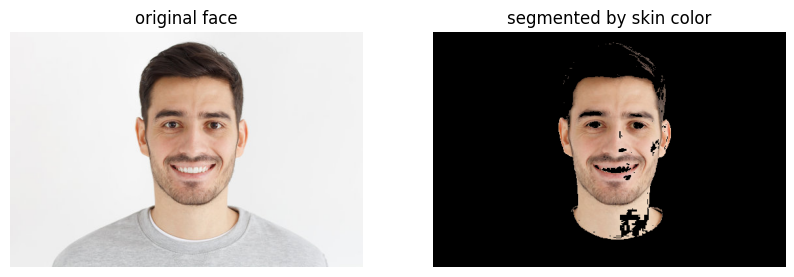

In [38]:
drive.mount('/content/drive')

image_path = '/content/drive/My Drive/Colab Notebooks/face2.jpg'
image = cv2.imread(image_path)

# Create an instance of LabeledImage for original_face
original_face = LabeledImage("original face", image)

# Now you can use original_face.image
original_face.image = cv2.cvtColor(original_face.image, cv2.COLOR_BGR2RGB)
hsv_image = cv2.cvtColor(original_face.image, cv2.COLOR_BGR2HSV)

# Определение диапазонов для цвета кожи
lower_skin = np.array([40, 50, 90], dtype=np.uint8)
upper_skin = np.array([200, 225, 255], dtype=np.uint8)

# Создание маски
skin_mask = cv2.inRange(hsv_image, lower_skin, upper_skin)

# Применение маски к изображению
segmented_skin = cv2.bitwise_and(original_face.image, original_face.image, mask=skin_mask)

show_multiple_images(
    original_face,
    LabeledImage('segmented by skin color', segmented_skin)
)

## Сегментация 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


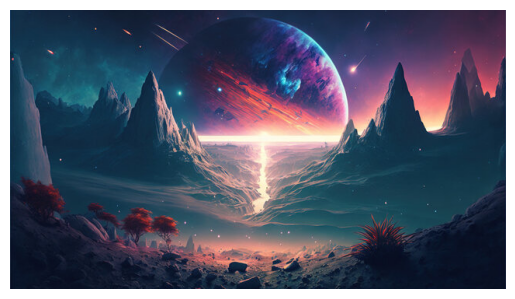

In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

image_path = '/content/drive/My Drive/Colab Notebooks/sample_pict.jpg'
image = cv2.imread(image_path)

# Преобразование изображения из BGR (формат OpenCV) в RGB (формат для matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Отображение изображения с помощью matplotlib
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


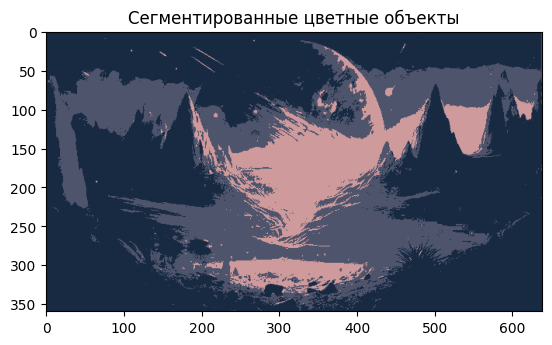

In [15]:
# Подключить Google Drive (необходимо только для Colab)
drive.mount('/content/drive')

# Путь к изображению
image_path = '/content/drive/My Drive/Colab Notebooks/sample_pict.jpg'  # Измените этот путь на ваш путь к изображению в Google Drive

# Загрузить изображение
image = cv2.imread(image_path)

# Преобразовать изображение в цветовое пространство Lab
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

# Подготовить данные для кластеризации k-means
pixel_values = image_lab.reshape((-1, 3)).astype(np.float32)  # Переформатировать для k-means

# Применить кластеризацию k-means
k = 3  # Количество кластеров
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2), attempts=10, flags=cv2.KMEANS_RANDOM_CENTERS)

# Сегментировать изображение на основе кластеров
segmented_image = centers[labels.flatten()].reshape(image.shape).astype(np.uint8)

# Отобразить результат
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_Lab2RGB))
plt.title("Сегментированные цветные объекты")
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


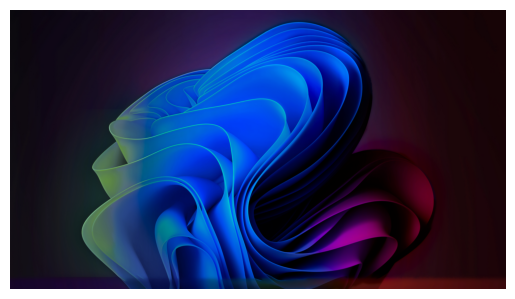

In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

image_path = '/content/drive/My Drive/Colab Notebooks/wall.jpg'
image = cv2.imread(image_path)

# Преобразование изображения из BGR (формат OpenCV) в RGB (формат для matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Отображение изображения с помощью matplotlib
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


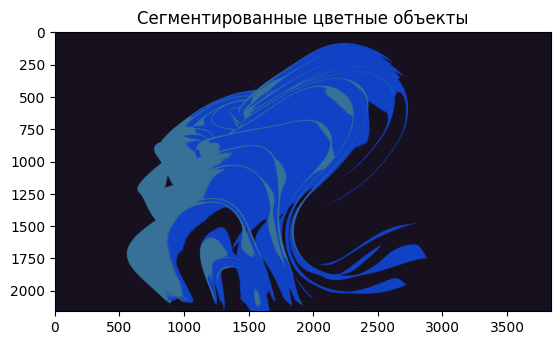

In [16]:
image_path = '/content/drive/My Drive/Colab Notebooks/wall.jpg'  # Измените этот путь на ваш путь к изображению в Google Drive

# Загрузить изображение
image = cv2.imread(image_path)

# Преобразовать изображение в цветовое пространство Lab
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

# Подготовить данные для кластеризации k-means
pixel_values = image_lab.reshape((-1, 3)).astype(np.float32)  # Переформатировать для k-means

# Применить кластеризацию k-means
k = 3  # Количество кластеров
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2), attempts=10, flags=cv2.KMEANS_RANDOM_CENTERS)

# Сегментировать изображение на основе кластеров
segmented_image = centers[labels.flatten()].reshape(image.shape).astype(np.uint8)

# Отобразить результат
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_Lab2RGB))
plt.title("Сегментированные цветные объекты")
plt.show()

## Метод К-средних

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


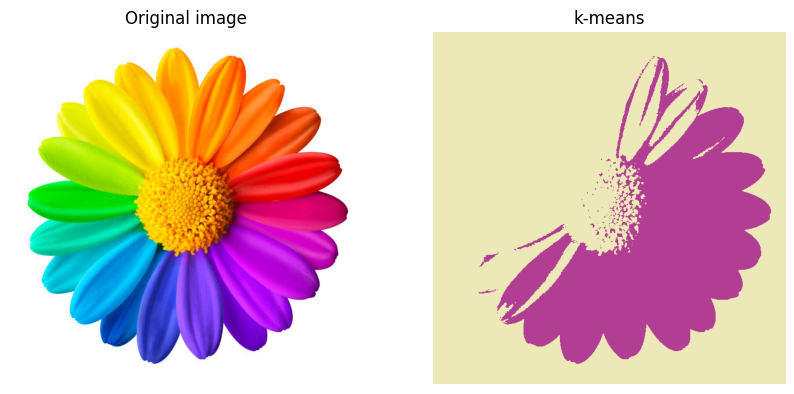

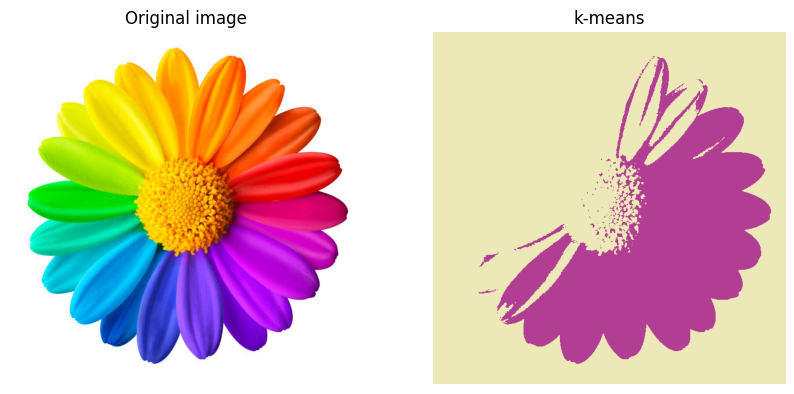

In [41]:
drive.mount('/content/drive')

class LabeledImage:
    def __init__(self, label, image):
        self.label = label
        self.image = image

def show_multiple_images(*images):
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5))

    for i, image in enumerate(images):
        axes[i].imshow(image.image)
        axes[i].set_title(image.label)
        axes[i].axis('off')

    plt.show()


image_path = '/content/drive/My Drive/Colab Notebooks/colors.jpg'
image = cv2.imread(image_path)

# Assuming original_color should hold the original image
original_color = LabeledImage('Original', image)

# Apply k-means and create a LabeledImage instance
k_means_applied = LabeledImage('k-means', cv2.cvtColor(apply_k_means(original_color.image), cv2.COLOR_LAB2RGB))

# Create a LabeledImage instance for the original image
original_fruits = LabeledImage('Original image', cv2.cvtColor(original_color.image, cv2.COLOR_BGR2RGB))

# Display the images
show_multiple_images(
    original_fruits,
    k_means_applied
)


def apply_k_means(image, num_clusters = 2):
    # Преобразование изображения в пространство CIE Lab
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

    # Изменение размера изображения для ускорения обработки
    h, w, c = lab_image.shape
    image_2d = lab_image.reshape((-1, 3))

    # Определение числа кластеров (например, 3)

    # Применение метода k-средних
    _, labels, centers = cv2.kmeans(image_2d.astype(np.float32),
        num_clusters,
        None,
        (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2),
        10,
        cv2.KMEANS_RANDOM_CENTERS
    )

    # Переход к исходной форме
    segmented_image = labels.reshape((h, w))

    # Создание цветного сегментированного изображения
    # Инициализируем сегментированное изображение с теми же размерами, что и оригинал
    segmented_image_color = np.zeros((h, w, 3), dtype=np.uint8)

    # Преобразуем центры в uint8
    centers = np.uint8(centers)

    # Перекрашиваем каждый кластер в соответствующий цвет
    for i in range(num_clusters):
        segmented_image_color[segmented_image == i] = centers[i]
    return segmented_image_color

k_means_applied = LabeledImage('k-means', cv2.cvtColor(apply_k_means(original_color.image), cv2.COLOR_LAB2RGB))
original_fruits.image = cv2.cvtColor(original_color.image, cv2.COLOR_BGR2RGB)
show_multiple_images(
    original_fruits,
    k_means_applied
)

## Сегментация 3

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Контраст: 355.1378719397364, Неоднородность: 11.869562267613114, Однородность: 0.2754520252577358



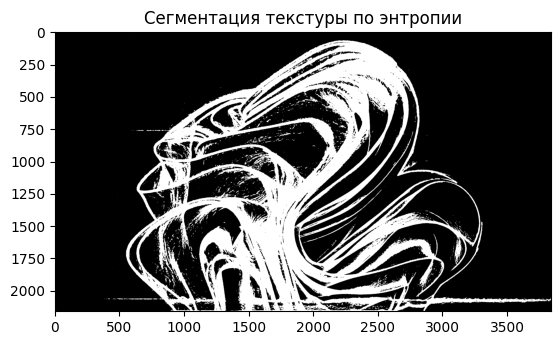

In [ ]:
# Импорт необходимых библиотек из skimage
from skimage.feature import graycomatrix, graycoprops  # Обновленные названия функций
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage import img_as_ubyte

# Подключить Google Drive (необходимо только для Colab)
drive.mount('/content/drive')
# Путь к изображению
image_path = '/content/drive/My Drive/Colab Notebooks/wall.jpg'  # Измените этот путь на ваш путь к изображению в Google Drive

# Загрузить изображение в оттенках серого
texture_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Вычислить энтропию для сегментации текстуры
entropy_image = entropy(texture_image, disk(5))  # Энтропия с использованием структурного элемента размером 5

# Нормализовать энтропию
entropy_normalized = img_as_ubyte(entropy_image / entropy_image.max())

# Вычислить матрицу пространственного распределения уровней серого (GLCM) и извлечь текстурные признаки
glcm = graycomatrix(entropy_normalized, distances=[5], angles=[0], symmetric=True, normed=True)  # Обновленное название функции
contrast = graycoprops(glcm, 'contrast')[0, 0]  # Обновленное название функции
dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]  # Обновленное название функции
homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]  # Обновленное название функции

print()
print(f"Контраст: {contrast}, Неоднородность: {dissimilarity}, Однородность: {homogeneity}")
print()

# Бинаризация на основе энтропии и отображение результата
_, texture_segment = cv2.threshold(entropy_normalized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(texture_segment, cmap='gray')
plt.title("Сегментация текстуры по энтропии")
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


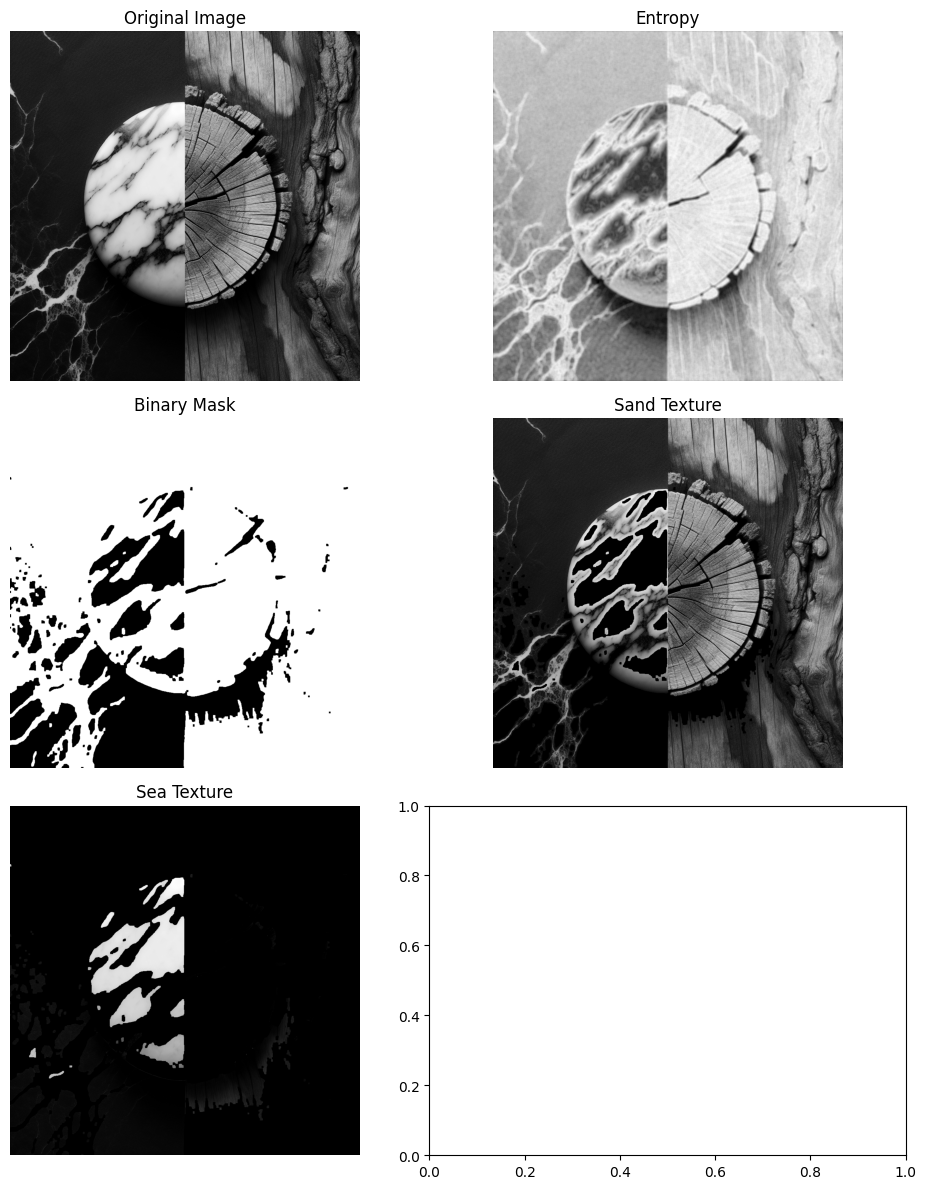

In [23]:
# Чтение изображения
# Подключить Google Drive (необходимо только для Colab)
drive.mount('/content/drive')
I = '/content/drive/My Drive/Colab Notebooks/example1.png'  # Измените этот путь на ваш путь к изображению в Google Drive


IMAGE = cv2.imread('/content/drive/My Drive/Colab Notebooks/example1.png')

# Now, convert the loaded image to grayscale:
IMAGE = cv2.cvtColor(IMAGE, cv2.COLOR_BGR2GRAY)  # Преобразуем изображение в оттенки серого

# Вычисление локальной энтропии
IMAGE_float = IMAGE.astype(np.float32) / 255  # Преобразуем в формат float
E = rank.entropy(IMAGE, disk(5))  # Локальная энтропия
Eim = exposure.rescale_intensity(E)  # Масштабируем интенсивность энтропии для визуализации

# Пороговая бинаризация
thresh = threshold_otsu(Eim)  # Находим оптимальный порог с помощью Otsu
binary_mask = Eim > thresh  # Применяем пороговую бинаризацию

# Морфологические операции для улучшения маски
kernel = np.ones((5, 5), np.uint8)  # Создаем ядро для морфологических операций
binary_mask = cv2.morphologyEx(binary_mask.astype(np.uint8), cv2.MORPH_CLOSE, kernel)  # Закрытие (для устранения мелких дыр)
binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)  # Открытие (для устранения шумов)

# Создание текстур
sand_texture = np.copy(IMAGE)  # Копируем исходное изображение для текстуры песка
sand_texture[binary_mask == 0] = 0  # Оставляем только песок

sea_texture = np.copy(IMAGE)  # Копируем исходное изображение для текстуры моря
sea_texture[binary_mask != 0] = 0  # Оставляем только море


show_multiple_images([
    ('Original Image', IMAGE),  # Оригинальное изображение
    ('Entropy', Eim),  # Локальная энтропия
    ('Binary Mask', binary_mask),  # Бинарная маска
    ('Sand Texture', sand_texture),  # Текстура песка
    ('Sea Texture', sea_texture)  # Текстура моря
])